<a href="https://colab.research.google.com/github/merylmizell/deeplearningproj1/blob/main/StockRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/merylmizell/deeplearningproj1.git


Cloning into 'deeplearningproj1'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 6.05 KiB | 1.21 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
%cd deeplearningproj1

/content/deeplearningproj1


In [4]:
!pip install yfinance

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Example: Fetch stock data for a given company (e.g., AAPL for Apple) and specific period
ticker = 'AAPL'
stock_data = yf.download(ticker, start="2020-01-01", end="2023-01-01", interval='1d')

# View the first few rows of the dataset
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876114  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167610  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400551  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565201  132079200


In [8]:
esg_data = pd.read_csv('ESGdata.csv')
print(esg_data.head())

  ticker                           name currency  \
0    dis                 Walt Disney Co      USD   
1     gm              General Motors Co      USD   
2    gww                WW Grainger Inc      USD   
3    mhk          Mohawk Industries Inc      USD   
4    lyv  Live Nation Entertainment Inc      USD   

                        exchange                            industry  \
0  NEW YORK STOCK EXCHANGE, INC.                               Media   
1  NEW YORK STOCK EXCHANGE, INC.                         Automobiles   
2  NEW YORK STOCK EXCHANGE, INC.  Trading Companies and Distributors   
3  NEW YORK STOCK EXCHANGE, INC.                   Consumer products   
4  NEW YORK STOCK EXCHANGE, INC.                               Media   

                                                logo  \
0  https://static.finnhub.io/logo/ef50b4a2b263c84...   
1  https://static.finnhub.io/logo/9253db78-80c9-1...   
2  https://static.finnhub.io/logo/f153dcda-80eb-1...   
3  https://static.finnhub.io/l

In [9]:
# Checking for missing values
print(stock_data.isnull().sum())
print(esg_data.isnull().sum())

# Drop unnecessary columns and handle missing values correctly
esg_data_cleaned = esg_data.drop(columns=['logo', 'weburl'])

# Use this line to avoid the warnings
esg_data_cleaned['industry'] = esg_data_cleaned['industry'].fillna('Unknown')

# Check if the missing values are now handled
print(esg_data_cleaned.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
ticker                   0
name                     0
currency                 0
exchange                 0
industry                13
logo                    20
weburl                  16
environment_grade        0
environment_level        0
social_grade             0
social_level             0
governance_grade         0
governance_level         0
environment_score        0
social_score             0
governance_score         0
total_score              0
last_processing_date     0
total_grade              0
total_level              0
cik                      0
dtype: int64
ticker                  0
name                    0
currency                0
exchange                0
industry                0
environment_grade       0
environment_level       0
social_grade            0
social_level            0
governance_grade        0
governance_level        0
environment_score       0
socia

In [10]:
# Get the list of tickers from ESG dataset
tickers = esg_data['ticker'].unique()

# Fetch stock data for the tickers
stock_data_combined = pd.DataFrame()


In [11]:
for ticker in tickers:
    try:
        stock_data = yf.download(ticker, start="2022-03-03", end="2024-03-03", interval='1d')
        stock_data['ticker'] = ticker
        stock_data_combined = pd.concat([stock_data_combined, stock_data])
    except Exception as e:
        print(f"Failed to retrieve data for {ticker}: {e}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Failed to retrieve data for alkt: 'ALKT'
Failed to retrieve data for alny: 'ALNY'
Failed to retrieve data for allt: 'ALLT'
Failed to retrieve data for allo: 'ALLO'


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Failed to retrieve data for amat: 'AMAT'
Failed to retrieve data for atvi: 'ATVI'


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Failed to retrieve data for avgo: 'AVGO'
Failed to retrieve data for anss: 'ANSS'
Failed to retrieve data for amzn: 'AMZN'
Failed to retrieve data for aihs: 'AIHS'
Failed to retrieve data for apa: 'APA'


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [12]:
# Merge stock data with ESG data
merged_data = pd.merge(stock_data_combined, esg_data, on='ticker', how='inner')

# View the merged data
print(merged_data.head())

         Open        High         Low       Close   Adj Close      Volume  \
0  147.309998  148.649994  144.449997  145.570007  144.430786   8048400.0   
1  144.009995  144.259995  139.550003  140.720001  139.618744  12913000.0   
2  140.279999  140.889999  133.440002  133.500000  132.455246  14549700.0   
3  133.020004  135.490005  129.289993  131.750000  130.718933  16552000.0   
4  135.490005  135.500000  133.360001  133.649994  132.604065  14673100.0   

  ticker            name currency                       exchange  ...  \
0    dis  Walt Disney Co      USD  NEW YORK STOCK EXCHANGE, INC.  ...   
1    dis  Walt Disney Co      USD  NEW YORK STOCK EXCHANGE, INC.  ...   
2    dis  Walt Disney Co      USD  NEW YORK STOCK EXCHANGE, INC.  ...   
3    dis  Walt Disney Co      USD  NEW YORK STOCK EXCHANGE, INC.  ...   
4    dis  Walt Disney Co      USD  NEW YORK STOCK EXCHANGE, INC.  ...   

  governance_grade governance_level environment_score social_score  \
0               BB          

In [13]:
# Selecting relevant columns for LSTM input (Stock prices and ESG scores)
# You can choose to include more features if needed (e.g., Open, Close, Environmental, Social, Governance scores)
features = merged_data[['Open', 'High', 'Low', 'Close', 'environment_score', 'social_score', 'governance_score']].values


In [14]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

In [15]:
# Prepare LSTM input (e.g., using 60 previous time steps to predict the next)
X = []
y = []
#use 60 for mid range analysis
time_step = 60

In [16]:
for i in range(time_step, len(features_scaled)):
    X.append(features_scaled[i-time_step:i, :])  # 60 time steps of features
    y.append(features_scaled[i, 3])  # The target is the 'Close' price

In [17]:
X, y = np.array(X), np.array(y)

# Reshape X into the format (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
# LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [20]:
model = Sequential()

# Adding the LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Adding more LSTM layers
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

In [22]:
# Output layer (regression)
model.add(Dense(units=1))  # Predicting one value (the stock price)

In [23]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - loss: 1.1234e-04
Epoch 2/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - loss: 2.6082e-05
Epoch 3/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - loss: 1.4386e-05
Epoch 4/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 70s 9ms/step - loss: 1.3501e-05
Epoch 5/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 1.2378e-05
Epoch 6/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 1.4217e-05
Epoch 7/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 1.3266e-05
Epoch 8/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - loss: 2.0971e-05
Epoch 9/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 71s 9ms/step - loss: 1.4322e-05
Epoch 10/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - loss: 9.7877e-06
Epoch 11/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - loss: 1.3051e-05
Epoch 12/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - loss: 1.9991e-05
Epoch 13/20
8046/8046 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 1.1485e-05
Epoch 14/20
8046/8046 ━━━━━━━━━━━━

In [24]:
# Predicting the stock prices
predicted_stock_price = model.predict(X_test)

2012/2012 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


In [26]:
# Create a separate scaler for the target variable (Close price)
close_price_scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler only on the 'Close' column (column index 3)
close_price_scaled = close_price_scaler.fit_transform(features[:, 3].reshape(-1, 1))

In [27]:
# Inverse scaling the predicted stock prices
predicted_stock_price = close_price_scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))

# Inverse scaling the actual test stock prices
real_stock_price = close_price_scaler.inverse_transform(y_test.reshape(-1, 1))

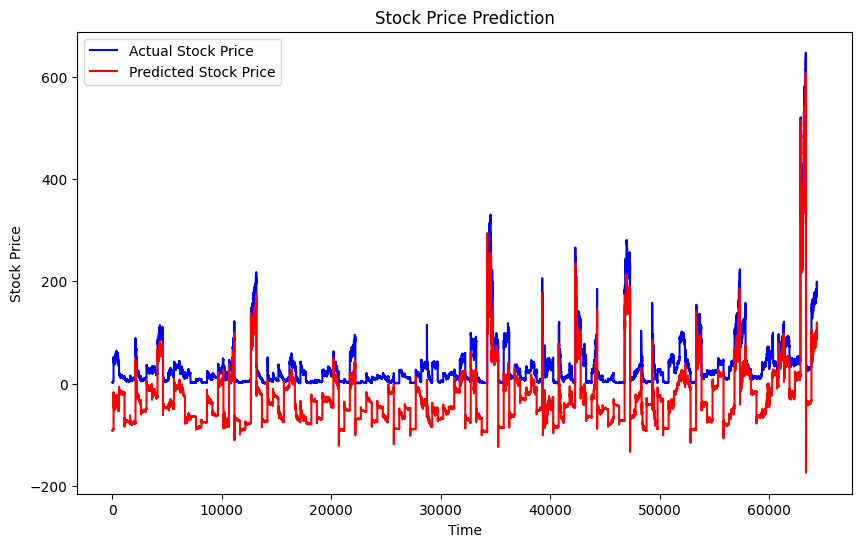

In [28]:
import matplotlib.pyplot as plt

# Plot the real vs predicted stock prices
plt.figure(figsize=(10,6))
plt.plot(real_stock_price, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(real_stock_price, predicted_stock_price)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

MSE: 4285.553229342112, MAE: 60.94767068407859, RMSE: 65.4641369708798


In [ ]:
#Now that we have stock price predictions, we can investigate how well the ESG scores align with the model’s performance. This is key for validating the hypothesis that higher ESG scores correlate with more stable stock performance.

#Group or sort companies based on their ESG scores and compare the predicted performance for companies with high ESG scores versus those with low ESG scores.
#Plot the average predicted stock growth for different ESG score groups (e.g., top 25% ESG vs. bottom 25%).

In [33]:
# Identify the indices in merged_data that correspond to the test data
test_indices = merged_data.index[-len(y_test):]  # Assuming test data corresponds to the last portion of the data

# Now assign the predicted stock prices to these indices
merged_data.loc[test_indices, 'predicted_stock_price'] = predicted_stock_price

# Create a new column for stock growth (predicted - actual) for the test data
merged_data['stock_growth'] = (merged_data['predicted_stock_price'] - merged_data['Close']) / merged_data['Close'] * 100  # Percentage growth

# Sort companies into quartiles based on their ESG total score
merged_data['esg_quartile'] = pd.qcut(merged_data['total_score'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Alternatively, compare top 25% (High) vs bottom 25% (Low)
top_25 = merged_data[merged_data['total_score'] >= merged_data['total_score'].quantile(0.75)]
bottom_25 = merged_data[merged_data['total_score'] <= merged_data['total_score'].quantile(0.25)]


In [34]:
# Calculate average stock growth for each ESG quartile
average_stock_growth_by_quartile = merged_data.groupby('esg_quartile')['stock_growth'].mean()

# Calculate average stock growth for top 25% vs bottom 25%
avg_growth_top_25 = top_25['stock_growth'].mean()
avg_growth_bottom_25 = bottom_25['stock_growth'].mean()

print("Average Stock Growth for Top 25% ESG:", avg_growth_top_25)
print("Average Stock Growth for Bottom 25% ESG:", avg_growth_bottom_25)


Average Stock Growth for Top 25% ESG: -125.33484367069975
Average Stock Growth for Bottom 25% ESG: -1667.966400966335


<ipython-input-34-ac7d96f939f5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_stock_growth_by_quartile = merged_data.groupby('esg_quartile')['stock_growth'].mean()


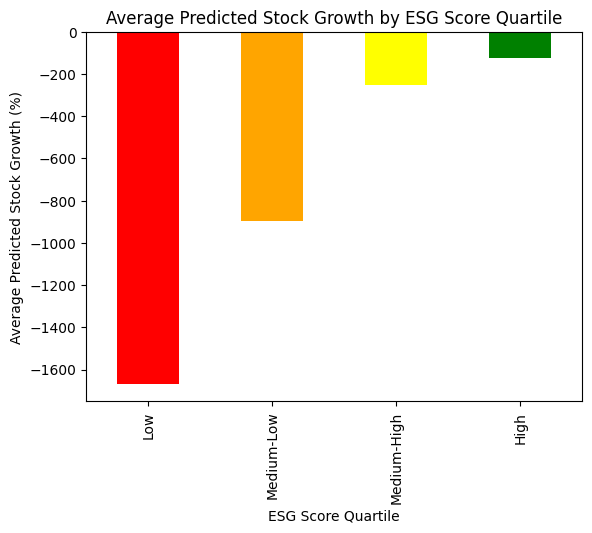

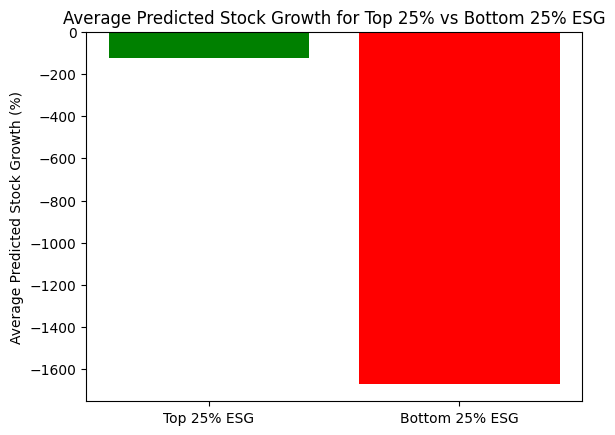

In [35]:
import matplotlib.pyplot as plt

# Bar plot for average stock growth by ESG quartile
average_stock_growth_by_quartile.plot(kind='bar', color=['red', 'orange', 'yellow', 'green'])
plt.title('Average Predicted Stock Growth by ESG Score Quartile')
plt.xlabel('ESG Score Quartile')
plt.ylabel('Average Predicted Stock Growth (%)')
plt.show()

# Bar plot for top 25% vs bottom 25%
plt.bar(['Top 25% ESG', 'Bottom 25% ESG'], [avg_growth_top_25, avg_growth_bottom_25], color=['green', 'red'])
plt.title('Average Predicted Stock Growth for Top 25% vs Bottom 25% ESG')
plt.ylabel('Average Predicted Stock Growth (%)')
plt.show()


In [ ]:
#Strategy 3: Create a ranking system that combines predicted stock performance and ESG scores into a single score (weighted average)